# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [7]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
# Create a new dataframe from your CSV

clothes = pd.read_csv("C:\\Users\\apr09\\OneDrive\\Desktop\\LaunchCode\\Codes\\LC 16\\archive (1)\\Womens Clothing E-Commerce Reviews.csv")

In [11]:
# Print out any information you need to understand your dataframe
print(clothes.shape)
print(clothes.dtypes)

(23486, 11)
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


In [12]:
clothes_numeric = clothes.select_dtypes(include=[np.number])
numeric_cols = clothes_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'Clothing ID' 'Age' 'Rating' 'Recommended IND'
 'Positive Feedback Count']


Now you have a dataframe set up, you are ready to dive in and start cleaning!

In [13]:
clothes_non_numeric = clothes.select_dtypes(exclude=[np.number])
non_numeric_cols = clothes_non_numeric.columns.values
print(non_numeric_cols)

['Title' 'Review Text' 'Division Name' 'Department Name' 'Class Name']


In [25]:
clothes.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2                        0         General         Dresses    Dresses   
3                        0  General Petite         Bottoms      Pants   
4                        6         General            Tops    Blouses   

   Title_ismissing  Review Text_ismissing  Division Name_ismissing  \
0             True                  False                    False   
1             True                  False                    False   
2            False                  False                    False   
3            False                  False                    False   
4            False                  False                    False   

   Department Name_ismissing  Class Name_ismissing  num_missing  
0                      False                 False            1  
1                      False                 False            1  
2                      False                 False            0  
3                      False                 False            0  
4                      False                 False            0

In [49]:
clothes.tail()

Unnamed: 0  Clothing ID  Age  \
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                        1  General Petite   

      Department Name Class Name  Title_ismissing  Review Text_ismissing  \
23481         Dresses    Dresses            False                  False   
23482            Tops      Knits            False                  False   
23483         Dresses    Dresses            False                  False   
23484         Dresses    Dresses            False                  False   
23485         Dresses    Dresses            False                  False   

       Division Name_ismissing  Department Name_ismissing  \
23481                    False                      False   
23482                    False                      False   
23483                    False                      False   
23484                    False                      False   
23485                    False                      False   

       Class Name_ismissing  num_missing  
23481                 False            0  
23482                 False            0  
23483                 False            0  
23484                 False            0  
23485                 False            0

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot: >

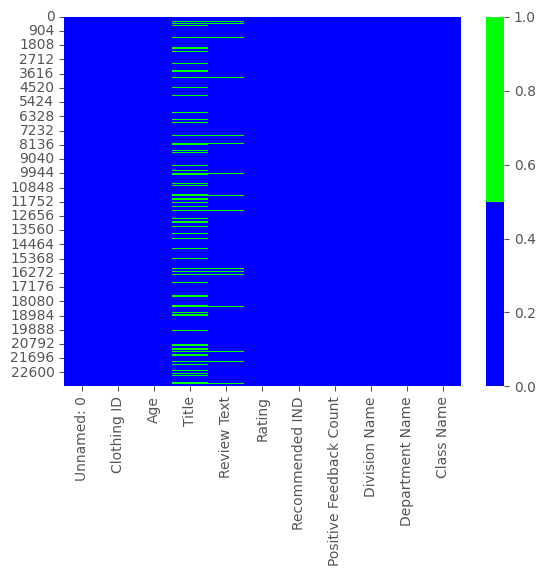

In [21]:
# Plot a heatmap of any missing data
cols = clothes.columns[:30]
colors = ['blue', 'lime']
sns.heatmap(clothes[cols].isnull(), cmap=sns.color_palette(colors))

In [22]:
# Try out a missing data percentage list! 
for col in clothes.columns:
    pct_missing = np.mean(clothes[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot: xlabel='index'>

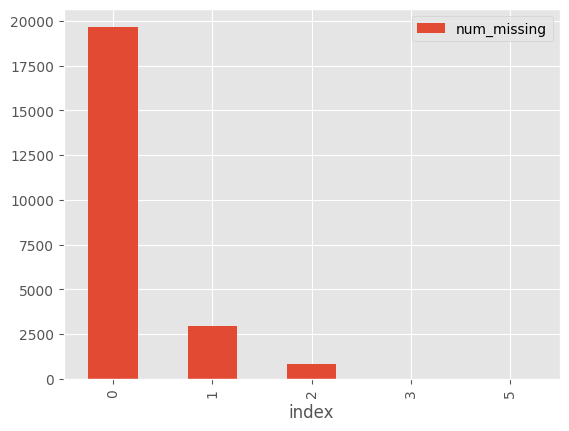

In [23]:
# Plot a missing data histogram
for col in clothes.columns:
    missing = clothes[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        clothes['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in clothes.columns if 'ismissing' in col]
clothes['num_missing'] = clothes[ismissing_cols].sum(axis=1)

clothes['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [28]:
# Handle any missing data in your dataframe.
clothes['Title'] = clothes['Title'].fillna('_MISSING_')
clothes['Review Text'] = clothes['Review Text'].fillna('_MISSING_')

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot: >

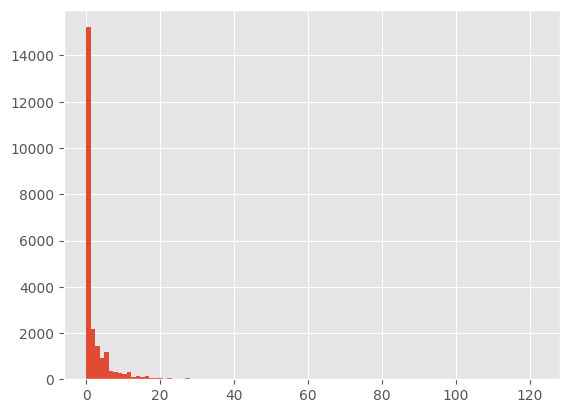

In [29]:
# Plot a histogram to see if there are any outliers.
clothes['Positive Feedback Count'].hist(bins=100)

In [30]:
# Use the describe() method
clothes['Positive Feedback Count'].describe()

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

In [ ]:
# Plot a bar chart
clothes['Class Name'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [44]:
# Handle any outliers in your dataframe
med = clothes["Positive Feedback Count"].median()
clothes.loc[clothes['Positive Feedback Count'] > 10, 'Positive Feedback Count'] = med 

In [ ]:
# I would not deal with the outliers in this data because no piece of 
# data is too far out from the others.

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [48]:
# Look for any irrelevant data in the dataframe. How will you handle it?

In [56]:
# The class name is irrelevant data as it is too similiar to department
# name. Only a few entries are different than the name of the department.
clothes.drop(columns=["Class Name", "Class Name_ismissing"])

Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                              _MISSING_   
1                                              _MISSING_   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                        1  General Petite   

      Department Name  Title_ismissing  Review Text_ismissing  \
0            Intimate             True                  False   
1             Dresses             True                  False   
2             Dresses            False                  False   
3             Bottoms            False                  False   
4                Tops            False                  False   
...               ...              ...                    ...   
23481         Dresses            False                  False   
23482            Tops            False                  False   
23483         Dresses            False                  False   
23484         Dresses            False                  False   
23485         Dresses            False                  False   

       Division Name_ismissing  Department Name_ismissing  num_missing  
0                        False                      False            1  
1                        False                      False            1  
2                        False                      False            0  
3                        False                      False            0  
4                        False                   

In [54]:
# Look for duplicates. How will you handle any duplicates?

df_dedupped = clothes.drop('Unnamed: 0', axis=1).drop_duplicates()

print(clothes.shape)
print(df_dedupped.shape)

(23486, 17)
(23465, 16)


In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

In [ ]:
# I believe that the uninformative data is the class name as this is 
#similar to other columns. Incorrect data entries could make data 
#uninformative. Too much missing data could also cause this.

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [64]:
# Try to convert all the strings in a column to lower or upper case. 
clothes['Title_lower'] = clothes['Title'].str.lower()
clothes['Title_lower'].value_counts(dropna=False)

_missing_                                  3810
love it!                                    136
beautiful                                    95
love                                         88
love!                                        84
                                           ... 
not for my body                               1
perfect transition dress                      1
the perfect spring dress!                     1
super soft but can make you look frumpy       1
please make more like this one!               1
Name: Title_lower, Length: 13994, dtype: int64

In [65]:
clothes['Review_lower'] = clothes['Review Text'].str.lower()
clothes['Review_lower'].value_counts(dropna=False)

_missing_                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 845
perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                                                                                                                                                        